The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


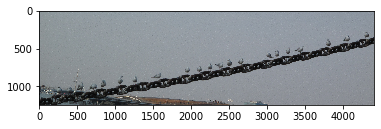

time: 1.48 s


In [3]:
%load_ext autotime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2 as cv
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.future import graph
from skimage import io, color

img = cv.cvtColor(cv.imread("im023.jpg"), cv.COLOR_BGR2RGB)
row, col = img.shape[:2]
img_reduc = img[(3*row)//8:(6*row)//8, :]
img_ready = cv.cvtColor(cv.GaussianBlur(img_reduc,(5,5),0), cv.COLOR_RGB2LAB)

plt.figure(figsize=(6,6))
plt.imshow(img_reduc)

points = []

# def mouse_callback(event,x,y,flags,param):
#     if event == cv.EVENT_LBUTTONDOWN:
#         cv.circle(img_reduc, (x, y), 5, (0, 255, 0), -1)
#         points.append((y,x))

# h, w = (1000, 1000)
# finished = False
# cv.destroyAllWindows()
# cv.namedWindow('image', cv.WINDOW_NORMAL,)
# cv.setWindowTitle("image", "Press Esc to close and Left mouse to select point")
# cv.resizeWindow('image', w, h) #Reasonable size window
# cv.setMouseCallback('image', mouse_callback) #Mouse callback
# while(not finished):
#     cv.imshow('image', img_reduc)
#     k = cv.waitKey(4) & 0xFF
#     if k == 27:
#         break
# cv.destroyAllWindows()

points = [(1056, 264), (1065, 401), (1007, 565), (1007, 724), (972, 856), (932, 1073), (919, 1289),
 (866, 1572), (791, 1969), (782, 2124), (746, 2260), (724, 2393), (702, 2525), (685, 2667), (596, 3033),
 (587, 3122), (548, 3289), (530, 3431), (437, 3819), (375, 4071), (335, 4332)]

def do_merge(img_ready, segments, thresh):
    def _weight_mean_color(graph, src, dst, n):
        diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
        diff = np.linalg.norm(diff)
        return {'weight': diff}

    def merge_mean_color(graph, src, dst):
        graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
        graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
        graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])
    g = graph.rag_mean_color(img_ready, segments)
    return graph.merge_hierarchical(segments, g, thresh=thresh, rag_copy=False, in_place_merge=True, merge_func=merge_mean_color, weight_func=_weight_mean_color)



In [ ]:
# 2000, sigma=0.25, min_size=5, thresh 25

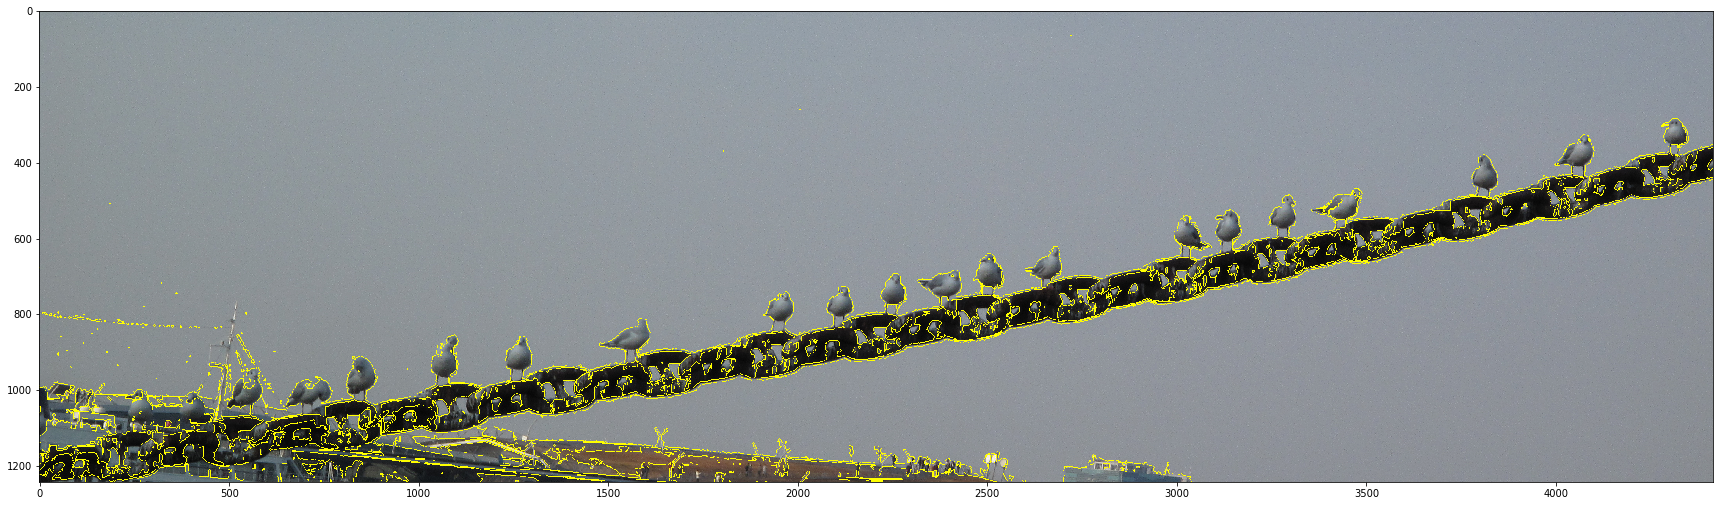

time: 9min 25s


In [11]:
segments = felzenszwalb(img_ready, scale=2000, sigma=0.25, min_size=5)
plt.figure(figsize=(30,30))
plt.imshow(mark_boundaries(img_reduc, do_merge(img_reduc, segments, 25)))

# plt.tight_layout()
plt.show()

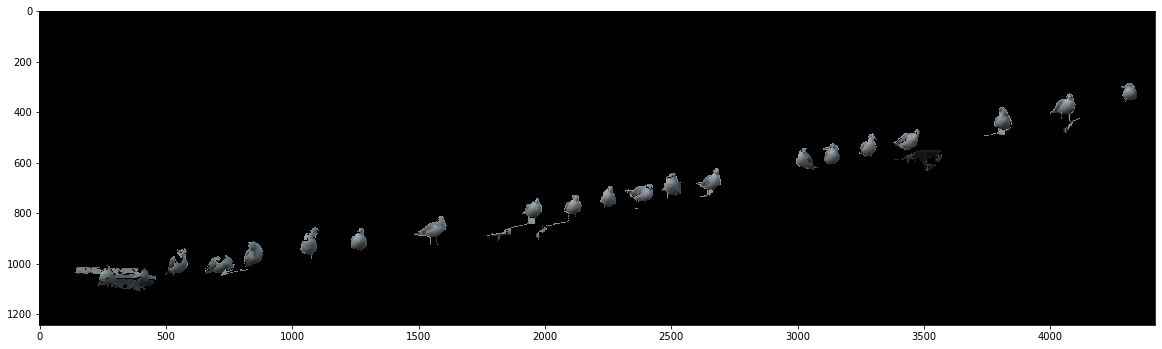

time: 1.64 s


In [15]:
img_tmp = np.zeros(img_reduc.shape[:2])
for (x,y) in points:
    label = segments[x, y]
    img_tmp[segments == label] = 1

one = img_tmp == 1
img_tmp = np.zeros(img_reduc.shape, dtype=np.uint64)
img_tmp[one] = img_reduc[one]
plt.figure(figsize=(20, 20))
plt.imshow(img_tmp)
plt.imsave("im08.jpg", np.array(img_tmp, dtype=np.uint8))
plt.show()